In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [3]:
img_path = '/cephyr/NOBACKUP/groups/globalpoverty1/data/dhs_tfrecords/angola_2006/00000.tfrecord.gz'

In [4]:
dataset = tf.data.TFRecordDataset(
    filenames=img_path,
    compression_type='GZIP')



In [5]:

# Config image parse from tfrecord
bands = ['BLUE', 'GREEN', 'RED', 'SWIR1', 'SWIR2', 'TEMP1', 'NIR', 'NIGHTLIGHTS']
n_temporal_frames = 10
keys_to_features = {}
for band in bands:
    keys_to_features[band] = tf.io.FixedLenFeature(shape=[224 ** 2 * n_temporal_frames], dtype=tf.float32)
scalar_float_keys = ['lat', 'lon', 'year', 'iwi']
for key in scalar_float_keys:
    keys_to_features[key] = tf.io.FixedLenFeature(shape=[], dtype=tf.float32)

# Parse and print all 13 samples
for i, example_proto in enumerate(dataset):
    ex = tf.io.parse_single_example(example_proto, features=keys_to_features)

    print(f'\nLocation nr. {i}')

    # Reshape to (10, 224, 224)
    for band in bands:
        ex[band] = tf.reshape(ex[band], (n_temporal_frames, 224, 224))

    # Print the value for all scalar_float_keys, but only the mean/shape for the bands
    for key in ex.keys():
        if key in bands:
            band_frames = ex[key].numpy()
            print(f'{key}: mean={band_frames.mean():.3f}, shape={band_frames.shape}')
        else:
            # key in scalar_float_keys
            print(f'{key}: {ex[key].numpy()}')
    print('')


Location nr. 0
BLUE: mean=0.058, shape=(10, 224, 224)
GREEN: mean=0.080, shape=(10, 224, 224)
NIGHTLIGHTS: mean=2.261, shape=(10, 224, 224)
NIR: mean=0.216, shape=(10, 224, 224)
RED: mean=0.087, shape=(10, 224, 224)
SWIR1: mean=0.229, shape=(10, 224, 224)
SWIR2: mean=0.145, shape=(10, 224, 224)
TEMP1: mean=297.973, shape=(10, 224, 224)
iwi: 68.09629821777344
lat: -12.169282913208008
lon: 13.859254837036133
year: 2006.0



In [18]:
for i, k in enumerate(ex):
    print(i, k)

0 BLUE
1 GREEN
2 NIGHTLIGHTS
3 NIR
4 RED
5 SWIR1
6 SWIR2
7 TEMP1
8 iwi
9 lat
10 lon
11 year


In [26]:

print(np.shape(img_data))

img_data_reshaped = img_data.reshape((80,224,224))

print(np.shape(img_data_reshaped))

print(np.mean(img_data_reshaped[1]))

(8, 10, 224, 224)
(80, 224, 224)
-0.16652832016546765


In [23]:
#img_path = '/cephyr/NOBACKUP/groups/globalpoverty1/data/dhs_tfrecords/egypt_2014/01166.tfrecord.gz'
#img_path = '/cephyr/NOBACKUP/groups/globalpoverty1/data/dhs_tfrecords/egypt_2014/01164.tfrecord.gz'
#img_path = '/cephyr/NOBACKUP/groups/globalpoverty1/data/dhs_tfrecords/egypt_2014/01158.tfrecord.gz'
#img_path = '/cephyr/NOBACKUP/groups/globalpoverty1/data/dhs_tfrecords/egypt_2014/01154.tfrecord.gz'
#img_path = '/cephyr/NOBACKUP/groups/globalpoverty1/data/dhs_tfrecords/egypt_2014/01163.tfrecord.gz'
#img_path = '/cephyr/NOBACKUP/groups/globalpoverty1/data/dhs_tfrecords/egypt_2014/01168.tfrecord.gz'
img_path = '/cephyr/NOBACKUP/groups/globalpoverty1/data/dhs_tfrecords/egypt_2014/01165.tfrecord.gz'
img_path = '/cephyr/NOBACKUP/groups/globalpoverty1/data/dhs_tfrecords/egypt_2014/01153.tfrecord.gz'
img_path = '/cephyr/NOBACKUP/groups/globalpoverty1/data/dhs_tfrecords/cameroon_2011/00115.tfrecord.gz'
img_path = '/cephyr/NOBACKUP/groups/globalpoverty1/data/dhs_tfrecords/rwanda_2008/00217.tfrecord.gz'









def year_to_index(year):
        year = year - 1990
        year = int(year/3)
        
        return year
    

# GET JUST A SINGLE TEMPORAL COMPOSITE
dataset = tf.data.TFRecordDataset(
     filenames=img_path,
     compression_type='GZIP'
 )

for i, example_proto in enumerate(dataset):
    ex = tf.io.parse_single_example(example_proto, features=keys_to_features)
    
    # Reshape to (10, 224, 224)
for band in bands:
    ex[band] = tf.reshape(ex[band], (n_temporal_frames, 224, 224))

    
img_data = np.empty((8,224,224))
for i, k in enumerate(ex):
    band_index = bands.index(k)
    composite_index = year_to_index(ex['year'])
    print(ex['iwi'])

    # Normalize data
    if k == 'NIGHTLIGHTS': 
        if ex['year'] > 2015:
            composite = (ex[k][composite_index] - band_means[8]) / band_stds[8]
            img_data[band_index] = composite.numpy()
        else:
            composite = (ex[k][composite_index] - band_means[7]) / band_stds[7]
            img_data[band_index] = composite.numpy()

    else:
        composite = (ex[k][composite_index] - band_means[band_index]) / band_stds[band_index]
        img_data[band_index] = composite.numpy()

    # Only get first 8 entries, i.e. all image bands
    if i >= 7:
        break

tf.Tensor(40.319046, shape=(), dtype=float32)
tf.Tensor(40.319046, shape=(), dtype=float32)
tf.Tensor(40.319046, shape=(), dtype=float32)
tf.Tensor(40.319046, shape=(), dtype=float32)
tf.Tensor(40.319046, shape=(), dtype=float32)
tf.Tensor(40.319046, shape=(), dtype=float32)
tf.Tensor(40.319046, shape=(), dtype=float32)
tf.Tensor(40.319046, shape=(), dtype=float32)


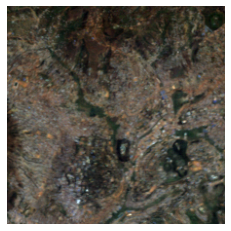

<AxesSubplot:>

In [24]:
from rasterio.plot import show
plt.axis('off')
#plt.savefig("overlap1.png",bbox_inches='tight')
show(img_data[(2,1,0),:,:], adjust=True)


In [29]:
print(np.shape(img_data))
print(np.mean(img_data, 0))

(8, 224, 224)
[[-0.29952498 -0.33422873 -0.30308323 ... -0.29680742 -0.31555897
  -0.30019229]
 [-0.24010404 -0.29651552 -0.26370752 ... -0.30079244 -0.30620168
  -0.27037944]
 [-0.23414166 -0.27801632 -0.32103442 ... -0.20577436 -0.23238558
  -0.28333304]
 ...
 [-0.38242327 -0.35466782 -0.28857549 ... -0.08599648 -0.17179785
  -0.23527363]
 [-0.37761189 -0.34562163 -0.30885214 ... -0.07786696 -0.19294045
  -0.24060935]
 [-0.31712004 -0.31573134 -0.24807914 ...  0.05515483 -0.09941912
  -0.18116352]]


In [8]:
img_tensor = torch.from_numpy(img_data_reshaped)


NameError: name 'img_data_reshaped' is not defined

In [32]:
dhs_clusters = pd.read_csv('dhs_clusters_paths.csv')
dhs_clusters.iloc[10]['iwi']

27.37037777272728

In [33]:
iwis = np.asarray(dhs_clusters.iloc[:,8])
print(iwis)
paths = np.asarray(dhs_clusters.iloc[:,9])
print(paths)

[68.0963003  10.60905316 29.97392816 ... 24.40632559 59.88734425
 58.38695137]
['/cephyr/NOBACKUP/groups/globalpoverty1/data/dhs_tfrecords/angola_2006/00000.tfrecord.gz'
 '/cephyr/NOBACKUP/groups/globalpoverty1/data/dhs_tfrecords/angola_2006/00001.tfrecord.gz'
 '/cephyr/NOBACKUP/groups/globalpoverty1/data/dhs_tfrecords/angola_2006/00002.tfrecord.gz'
 ...
 '/cephyr/NOBACKUP/groups/globalpoverty1/data/dhs_tfrecords/zimbabwe_2015/00397.tfrecord.gz'
 '/cephyr/NOBACKUP/groups/globalpoverty1/data/dhs_tfrecords/zimbabwe_2015/00398.tfrecord.gz'
 '/cephyr/NOBACKUP/groups/globalpoverty1/data/dhs_tfrecords/zimbabwe_2015/00399.tfrecord.gz']


In [7]:
# BLUE
# GREEN
# RED
# SWIR1
# SWIR2
# TEMP1
# NIR
# DMSP (used before and on 2015) Nightlights
# VIIRS (used after 2015) Nightlights

band_means = [0.06614169065743208,
0.09635988259340068,
0.11381173286380034,
0.2403052018705142,
0.169467635861788,
281.2976763110107,
0.24095368620456603,
13.069690484896771,
5.075756473790338]

band_stds = [
0.03512808462999218,
0.050729950158437294,
0.07239252056994558,
0.12444550248291769,
0.10850729467914068,
71.28094889057179,
0.09077465132496389,
18.566259343422725,
15.861609457767129
]

In [9]:
from timeit import default_timer as timer

In [4]:


# Attempt to get image and label from dataloader
# SUUUUPER SLOW
start = timer()
for i, (image, label) in enumerate(loader):
    end = timer()
    print(end - start)
    print(i, np.shape(image), label)
    print()
    
    if i == 10:
        break

NameError: name 'loader' is not defined

# Test MS_NL_ResNet18 with supervised dataset

In [2]:
# HÄRIFRÅN JESPER

import supervised_dataset
import importlib
importlib.reload(supervised_dataset)

s_dataset = supervised_dataset.SupervisedDataset('dhs_clusters_paths.csv')#, print_times=True)

In [4]:
# Create DataLoader
loader = torch.utils.data.DataLoader(
        s_dataset, batch_size=2,
)

### Import model

In [3]:
!pip install pylibjpeg-libjpeg

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.22.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.5.0 requires numpy~=1.19.2, but you'll have numpy 1.22.3 which is incompatible.
torchvision 0.11.3 requires torch==1.10.2, but you'll have torch 1.8.1 which is incompatible.
imageio 2.16.1 requires pillow>=8.3.2, but you'll have pillow 8.0.1 which is incompatible.
You should consider upgrading via the '/apps/Arch/software/Python/3.8.6-GCCcore-10.2.0/bin/python3.8 -m pip install --upgrade pip' command.


In [6]:
#!module spider torchvision
!module load torchvision/0.9.1-fosscuda-2020b-PyTorch-1.8.1

In [2]:
# Try to import model
import sys
sys.path.insert(0, '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/geography-aware-ssl/moco_fmow/moco')
from ms_nl_resnet import MS_NL_ResNet18
#importlib.reload(ms_nl_resnet)
#model = MS_NL_ResNet18(num_classes=1)
#print(model)

/cephyr/users/benvin/Alvis/.local/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: /cephyr/users/benvin/Alvis/.local/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZNK3c106IValue23reportToTensorTypeErrorEv
  warn(f"Failed to load image Python extension: {e}")


### Pass batch of images through model

In [10]:
# Try to pass image through model and inspect output
model = MS_NL_ResNet18(num_classes=1, last_layer_activation=torch.nn.ReLU())

start = timer()
for i, (image, label) in enumerate(loader):
    end = timer()
    print(end - start)
    print(i, np.shape(image), label)
    print()
    
    if i == 0:
        break
output = model(image.float())

print(output)
# NL needs to be fed every 8th channel instead of only last

2.2720611399854533
0 torch.Size([2, 8, 224, 224]) tensor([68.0963, 10.6091], dtype=torch.float64)

tensor([[0.0648],
        [0.0401]], grad_fn=<ReluBackward0>)


### Load model from checkpoint and pass batch of images through

In [38]:
# THIS WORKS, EASIER TO LOAD CHECKPOINT FOR ENTIRE MODEL OUTSIDE THE MODEL CLASS INSTEAD OF 
# LOADING FOR MS AND NL RESNETS SEPARATELY IN "ms_nl_resnet.py"

model_check = MS_NL_ResNet18(num_classes=1)

checkpoint_path = 'checkpoint_0199.pth.tar'
checkpoint = torch.load(checkpoint_path, map_location='cpu')
        
# Get size of last layer in checkpoint model in order to load weights smoothly
#checkpoint_output_size = next(reversed(checkpoint['state_dict'].items()))[1].size()[0]
checkpoint_output_size = 1

# Extract weights of key encoder from MoCo pretraining
checkpoint_dict = dict()
for key in checkpoint['state_dict'].keys():
    #if "module.ms_resnet18." in key:
    resnet_key=key.replace("module.", "")
    #resnet_key=resnet_key.replace("ms_resnet18.", "")
    #resnet_key=key
    checkpoint_dict[resnet_key]=checkpoint['state_dict'][key]
    #print(resnet_key, checkpoint_dict[resnet_key].size(), model.state_dict()[resnet_key].size())
    #print
            
model_check.load_state_dict(checkpoint_dict)

<All keys matched successfully>

In [39]:
# Try passing images through model after loading checkpoint
start = timer()
for i, (image, label) in enumerate(loader):
    end = timer()
    print(end - start)
    print(i, np.shape(image), label)
    print()
    
    if i == 0:
        break
output = model_check(image.float())

print(output)

0.20778581898775883
0 torch.Size([2, 8, 224, 224]) tensor([68.0963, 10.6091], dtype=torch.float64)

tensor([[0.],
        [0.]], grad_fn=<ReluBackward0>)


In [ ]:
for key in checkpoint['state_dict'].keys():
    print(key)

In [9]:
#import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print(gpu)
    tf.config.experimental.set_memory_growth(gpu, True)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


RuntimeError: Physical devices cannot be modified after being initialized

# TRAINING LOOP

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [3]:
# Try to import model
import sys
sys.path.insert(0, '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/geography-aware-ssl/moco_fmow/moco')
from ms_nl_resnet import MS_NL_ResNet18
#importlib.reload(ms_nl_resnet)
#model = MS_NL_ResNet18(num_classes=1)
#print(model)

/cephyr/users/benvin/Alvis/.local/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: /cephyr/users/benvin/Alvis/.local/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZNK3c106IValue23reportToTensorTypeErrorEv
  warn(f"Failed to load image Python extension: {e}")


In [26]:
import supervised_dataset
import importlib
importlib.reload(supervised_dataset)

<module 'supervised_dataset' from '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/Supervised/supervised_dataset.py'>

In [36]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

device = get_available_gpus()
print(device)
#print(tf.config.experimental.get_memory_info(device))

['/device:GPU:0', '/device:GPU:1', '/device:GPU:2', '/device:GPU:3']


In [9]:
# GPU memory test, DataLoader/Dataset is taking too much memory on GPU
print("before creating dataloader")
!nvidia-smi

train_set = supervised_dataset.SupervisedDataset('dhs_clusters_paths_small.csv', print_times=True)
train_loader = torch.utils.data.DataLoader(
        train_set, batch_size=8,
        drop_last=True
)

print("BEFORE ENUMERATING LOADER")
print("torch.cuda.memory_allocated: %fGB"%(torch.cuda.memory_allocated(0)/1024/1024/1024))
print("torch.cuda.memory_reserved: %fGB"%(torch.cuda.memory_reserved(0)/1024/1024/1024))
print("torch.cuda.max_memory_reserved: %fGB"%(torch.cuda.max_memory_reserved(0)/1024/1024/1024))

!nvidia-smi

print("TF usage: ", tf.config.experimental.get_memory_info(device))

print()
print()
print("AFTER ENUMERATING LOADER")

for i, (images, labels) in enumerate(train_loader):
    print("torch.cuda.memory_allocated: %fGB"%(torch.cuda.memory_allocated(0)/1024/1024/1024))
    print("torch.cuda.memory_reserved: %fGB"%(torch.cuda.memory_reserved(0)/1024/1024/1024))
    print("torch.cuda.max_memory_reserved: %fGB"%(torch.cuda.max_memory_reserved(0)/1024/1024/1024))
    
    #!nvidia-smi
    
    print()
    print("TF usage: ", tf.config.experimental.get_memory_info(device))
    print()
    
    break

before creating dataloader
Mon Apr 25 17:47:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.39.01    Driver Version: 510.39.01    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:2F:00.0 Off |                    0 |
| N/A   39C    P0    27W /  70W |    663MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                             

In [7]:
torch.cuda.device_count()
print("torch.cuda.memory_allocated: %fGB"%(torch.cuda.memory_allocated(0)/1024/1024/1024))
print("torch.cuda.memory_reserved: %fGB"%(torch.cuda.memory_reserved(0)/1024/1024/1024))
print("torch.cuda.max_memory_reserved: %fGB"%(torch.cuda.max_memory_reserved(0)/1024/1024/1024))

torch.cuda.memory_allocated: 0.000000GB
torch.cuda.memory_reserved: 0.000000GB
torch.cuda.max_memory_reserved: 0.000000GB


In [6]:
!nvidia-smi

Mon Apr 25 17:45:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.39.01    Driver Version: 510.39.01    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:2F:00.0 Off |                    0 |
| N/A   38C    P0    27W /  70W |    663MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [12]:
from tensorboardX import SummaryWriter
import time
import torch.distributed as dist

#del train_set, train_loader, model, gpu, criterion, epoch, writer, optimizer
torch.cuda.empty_cache()

train_set = supervised_dataset.SupervisedDataset('dhs_clusters_paths_small.csv')#, print_times=True)
train_loader = torch.utils.data.DataLoader(
        train_set, batch_size=2,
        drop_last=True
)

val_set = supervised_dataset.SupervisedDataset('dhs_clusters_paths_small.csv')#, print_times=True)
val_loader = torch.utils.data.DataLoader(
        val_set, batch_size=2,
        drop_last=True
)

model = MS_NL_ResNet18(num_classes=1)

print("CUDA: ", torch.cuda.is_available())

gpu = 0

criterion = torch.nn.MSELoss().cuda(gpu)

epoch=1

writer = SummaryWriter()

optimizer = torch.optim.Adam(model.parameters(), lr=0.002)

############
torch.cuda.set_device(gpu)
model.cuda(gpu)


# DISTRiBUTED
#dist.init_process_group(backend='nccl', init_method='tcp://127.0.0.1:8893',
#                                world_size=1, rank=0)

#model.cuda()
#model = torch.nn.parallel.DistributedDataParallel(model)

#train_sampler = torch.utils.data.distributed.DistributedSampler(
#            train_dataset)
print()




CUDA:  True



In [24]:
csv = pd.read_csv('dhs_clusters_paths_small.csv', header=0)
csv.head()

indices = np.asarray([1, 3, 5, 7, 9])

csv2 = csv.iloc[indices]
csv2.head()

,country,year,lat,lon,GID_1,GID_2,households,rural,iwi,file
1,angola,2006,-12.361700,14.778201,AGO.2,AGO.2.2,19,1,10.609053,/cephyr/NOBACKUP/groups/globalpoverty1/data/dh...
3,angola,2006,-9.991311,14.898295,AGO.7,AGO.7.5,1,1,7.704135,/cephyr/NOBACKUP/groups/globalpoverty1/data/dh...
5,angola,2006,-11.346350,15.073653,AGO.7,AGO.7.12,24,1,10.653362,/cephyr/NOBACKUP/groups/globalpoverty1/data/dh...
7,angola,2006,-12.747312,13.607121,AGO.2,AGO.2.3,22,0,66.059021,/cephyr/NOBACKUP/groups/globalpoverty1/data/dh...
9,angola,2006,-13.130185,13.109428,AGO.2,AGO.2.1,24,1,20.937783,/cephyr/NOBACKUP/groups/globalpoverty1/data/dh...


In [27]:
asd_set = supervised_dataset.SupervisedDataset('dhs_clusters_paths_small.csv', indices)#, print_times=True)
asd_loader = torch.utils.data.DataLoader(
        asd_set, batch_size=2,
        drop_last=True
)

for i, (images, labels) in enumerate(asd_loader):
    print(images.size(), i)

torch.Size([2, 8, 224, 224]) 0
torch.Size([2, 8, 224, 224]) 1


In [32]:
import pickle as pkl

folds_path = '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/CreateFolds/new_dhs_incountry_folds.pkl'

with open(folds_path, 'rb') as handle:
    folds = pickle.load(handle)
    
folds['A']

{'test': array([    0,     2,     3, ..., 56728, 56730, 56735], dtype=int32),
 'val': array([   14,    17,    18, ..., 56679, 56680, 56703], dtype=int32),
 'train': array([    1,     4,     5, ..., 56738, 56739, 56740], dtype=int32)}

In [10]:
def validate(model, loss_fn, val_loader, device):
    val_loss_cum = 0
    model.eval()
    with torch.no_grad():
        for batch_index, (x, y) in enumerate(val_loader, 1):
            inputs, labels = x.cuda(device), y.cuda(device)
            z = model.forward(inputs)
            z = torch.squeeze(z)

            batch_loss = loss_fn(z, labels)
            val_loss_cum += batch_loss.item()

    return val_loss_cum/len(val_loader)

In [13]:
model.train()
#n_iters = len(train_loader) * epoch

epochs = 5
losses = [[] for x in range(epochs)]
val_losses = [0] * epochs

end = time.time()
for epoch in range(epochs):
    #train_sampler.set_epoch(epoch)
    
    for i, (images, labels) in enumerate(train_loader):
        # measure data loading time
        print("batch: ", i)

        print()

        images = images.cuda(gpu)#, non_blocking=True)


        labels = labels.cuda(gpu)#, non_blocking=True)

        optimizer.zero_grad()

        output = model(images)

        output = torch.squeeze(output)

        loss = criterion(output, labels)

        print("LOSS: ", loss)

        # compute gradient and do SGD step
        loss.backward()
        optimizer.step()

        #print(loss.size())
        losses[epoch].append(loss.detach().item())

        # measure elapsed time
        #batch_time.update(time.time() - end)
        print(time.time() - end)
        #end = time.time()


    
    val_losses[epoch] = validate(model, criterion, val_loader, gpu)
    
    #if epoch % 2 == 0:
    #    torch.save({
    #        'epoch': epoch,
    #        'model_state_dict': model.state_dict(),
    #        'optimizer_state_dict': optimizer.state_dict(),
    #        'loss': loss,
    #        }, 'checkpoint_supervised_{:04d}.pth.tar'.format(epoch))

    
print(np.mean(losses, axis=0))
print("Val loss: ", val_losses)
#!nvidia-smi


# torch.save({
#             'epoch': epoch,
#             'model_state_dict': model.state_dict(),
#             'optimizer_state_dict': optimizer.state_dict(),
#             'loss': loss,
#             }, 'checkpoint_supervised_{:04d}.pth.tar'.format(epoch))

def save_checkpoint(state, is_best, filename='checkpoint_supervised.pth.tar'):
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, 'model_best.pth.tar')

batch:  0

LOSS:  tensor(2373.7092, device='cuda:0', grad_fn=<MseLossBackward>)
0.22944331169128418
batch:  1

LOSS:  tensor(410.8382, device='cuda:0', grad_fn=<MseLossBackward>)
0.44634032249450684
batch:  2

LOSS:  tensor(68.1357, device='cuda:0', grad_fn=<MseLossBackward>)
0.655386209487915
batch:  3

LOSS:  tensor(3406.9656, device='cuda:0', grad_fn=<MseLossBackward>)
0.8648507595062256
batch:  4

LOSS:  tensor(1336.7583, device='cuda:0', grad_fn=<MseLossBackward>)
1.0746738910675049
batch:  5

LOSS:  tensor(138.1479, device='cuda:0', grad_fn=<MseLossBackward>)
1.2936344146728516
batch:  6

LOSS:  tensor(22.6257, device='cuda:0', grad_fn=<MseLossBackward>)
1.5022938251495361
batch:  0

LOSS:  tensor(2322.6301, device='cuda:0', grad_fn=<MseLossBackward>)
2.936264753341675
batch:  1

LOSS:  tensor(826227.9375, device='cuda:0', grad_fn=<MseLossBackward>)
3.1445441246032715
batch:  2

LOSS:  tensor(112.3517, device='cuda:0', grad_fn=<MseLossBackward>)
3.3530168533325195
batch:  3

LOSS

[[2357.809814453125, 401.118408203125, 72.071044921875, 3466.16357421875, 1078.8482666015625, 256.29583740234375, 40.19270706176758], [1726.695068359375, 78.37979125976562, 48.244606018066406, 2435.1962890625, 546.4178466796875, 361.98406982421875, 195.1053924560547], [907.6664428710938, 17.655973434448242, 128.21421813964844, 1707.1251220703125, 198.02406311035156, 288.1796875, 344.25994873046875], [514.7008666992188, 39.985626220703125, 144.11776733398438, 1264.183837890625, 77.29261779785156, 259.32513427734375, 295.02081298828125], [357.0130615234375, 65.30076599121094, 158.73971557617188, 1037.3001708984375, 170.69219970703125, 161.2042236328125, 293.71148681640625], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],

Text(0.5, 1.0, 'Loss for supervised training')

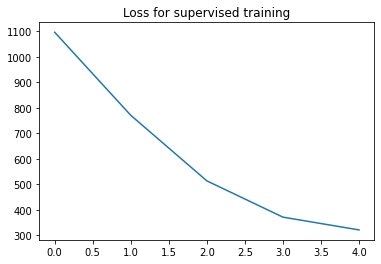

In [30]:
import matplotlib.pyplot as plt

print(losses)
epoch_losses = []

textfile = open("losses4.txt", "w")
for epoch in losses:
    if len(epoch) != 0:
        mean_loss = np.mean(epoch)
        epoch_losses.append(mean_loss)
        textfile.write(str(mean_loss) + "\n")
    #for element in epoch:
    #    textfile.write(str(element) + "\n")
    #textfile.write("\n")
textfile.close()

print(epoch_losses)
plt.plot(epoch_losses)
plt.title("Loss for supervised training")

In [22]:
print("torch.cuda.memory_allocated: %fGB"%(torch.cuda.memory_allocated(0)/1024/1024/1024))
print("torch.cuda.memory_reserved: %fGB"%(torch.cuda.memory_reserved(0)/1024/1024/1024))
print("torch.cuda.max_memory_reserved: %fGB"%(torch.cuda.max_memory_reserved(0)/1024/1024/1024))

torch.cuda.memory_allocated: 0.520993GB
torch.cuda.memory_reserved: 3.376953GB
torch.cuda.max_memory_reserved: 3.376953GB


In [47]:
from pynvml import *
nvmlInit()
h = nvmlDeviceGetHandleByIndex(0)
info = nvmlDeviceGetMemoryInfo(h)
print(f'total    : {info.total}')
print(f'free     : {info.free}')
print(f'used     : {info.used}')

total    : 16106127360
free     : 11010048
used     : 16095117312


In [51]:
torch.cuda.memory_summary()

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 13           |        cudaMalloc retries: 14        |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |  555126 KB |  555126 KB |    1731 MB |    1189 MB |\n|       from large pool |  471808 KB |  471808 KB |    1532 MB |    1072 MB |\n|       from small pool |   83318 KB |  114341 KB |     198 MB |     117 MB |\n|---------------------------------------------------------------------------|\n| Active memory         |  555126 KB |  555126 KB |    1731 MB |    1189 MB |\n|       from large pool |  471808 KB |  471808 KB |

In [26]:
!pip install nvidia-ml-py3
import nvidia_smi

nvidia_smi.nvmlInit()

deviceCount = nvidia_smi.nvmlDeviceGetCount()
for i in range(deviceCount):
    handle = nvidia_smi.nvmlDeviceGetHandleByIndex(i)
    info = nvidia_smi.nvmlDeviceGetMemoryInfo(handle)
    print("Device {}: {}, Memory : ({:.2f}% free): {}(total), {} (free), {} (used)".format(i, nvidia_smi.nvmlDeviceGetName(handle), 100*info.free/info.total, info.total, info.free, info.used))

nvidia_smi.nvmlShutdown()

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/apps/Arch/software/Python/3.8.6-GCCcore-10.2.0/bin/python3.8 -m pip install --upgrade pip' command.
Device 0: b'Tesla T4', Memory : (0.29% free): 16106127360(total), 46661632 (free), 16059465728 (used)


In [2]:
textfile = open("losses_fold_{}_epoch_{:04d}_.txt".format("A", 1337), "w")
    
textfile.write("hej hej")

textfile.close()